# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [2296]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 


## Cargar datos

In [2297]:
# Carga los archivos de datos en diferentes DataFrames
df_users = pd.read_csv('megaline_users.csv')
df_calls = pd.read_csv('megaline_calls.csv')
df_messages = pd.read_csv('megaline_messages.csv')
df_internet = pd.read_csv('megaline_internet.csv')
df_plans = pd.read_csv('megaline_plans.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [2298]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [2299]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


En esta tabla encontramos ocho columnas y dos filas con las caracteristicas de los dos planes que Megaline ofrece a sus usuarios, el plan SURF y enl plan ULTIMATE. Se especifica el numero de mensajes, megabites y minutos incluidos y el costo de cada plan. De igual forma, nos señalan la cuota adicional que se le cobran a los clientes por exeder los mensajes, minutos o megas que incluye su plan contratado. Por ejemplo, si un usuario que tiene el plan ULTIMATE y gasta y ocupa 30721 megabites en el mes, se le cobraria 7 dolares extras. 

Tenemos dos columnas con datos flotantes, que son usd_per_gb y usd_per minutes; una columna de tipo objeto, plan_name; y 5 columnas con datos enteros, las cuales son messages_included, mb_per_month_included, minutes_included, usd_monthly_pay y usd_per_gb. No tenemos ningun dato ausente o fila repetida. 

Para practicidad al momento del procesamiento de datos, se realizaran las siguientes modificaciones:
* Se pondra en mayuscula los datos de la colunma plan_name y quitaremos espacios no deseados. 
* Cambiar los nombres de las culumnas con el fin de tener una mejor semántica y quitaremos espacios no deseados.   

## Corregir datos

Columna plan_name

In [2300]:
df_plans['plan_name'] = df_plans['plan_name'].str.upper()
df_plans['plan_name'] = df_plans['plan_name'].str.strip()
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,SURF
1,1000,30720,3000,70,7,0.01,0.01,ULTIMATE


## Enriquecer los datos

Cambiar nombre de columnas y quitar espacios no deseados.

In [2301]:
df_plans.columns = [col.strip() for col in df_plans.columns]
df_plans = df_plans.rename(columns ={'usd_per_gb': 'usd_per_ext_gb', 'usd_per_message': 'usd_per_ext_message', 'usd_per_minute': 'usd_per_ext_minute'})
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_ext_gb,usd_per_ext_message,usd_per_ext_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,SURF
1,1000,30720,3000,70,7,0.01,0.01,ULTIMATE


## Usuarios/as

In [2302]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [2303]:
# Imprime una muestra de datos para usuarios
df_users.sample(15)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
492,1492,Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,NaN
107,1107,Lane,Cash,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-15,ultimate,NaN
481,1481,Roni,Frye,32,"Urban Honolulu, HI MSA",2018-12-27,surf,NaN
219,1219,Gavin,Keller,51,"Detroit-Warren-Dearborn, MI MSA",2018-05-14,surf,NaN
104,1104,Thurman,Stephens,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-12-23,ultimate,NaN
320,1320,Bert,Wells,23,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-02-23,surf,NaN
441,1441,Piedad,Myers,23,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-08,ultimate,2018-08-19
348,1348,Carl,Rutledge,60,"Detroit-Warren-Dearborn, MI MSA",2018-10-05,surf,NaN
305,1305,Gwenn,Gross,18,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-05-08,surf,NaN
347,1347,Trey,Lynch,65,"Charleston-North Charleston, SC MSA",2018-06-17,ultimate,NaN


In [2304]:
df_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [2305]:
df_users.duplicated().value_counts()

False    500
Name: count, dtype: int64

In [2306]:
df_users['age'].describe()

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64

In [2307]:
df_users[df_users.isna().any(axis=1)]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [2308]:
df_users['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

Tenemos una tabla de ocho columnas y 500 filas, donde encontramos los datos de los usuarios de Megaline. Tenemos dos columnas con datos enteros, las cuales son user:id y age. El resto de las columnas contienen datos de tipo objeto. Podemos observar algumos de los datos estan el mayusculas y contienen signos de pausa (',', '-', '.') o estan divididos por diagonales ('/'). En la columnas reg_date tenemos las fechas de suscripción de cada usuario en formato aaaa-mm-dd, sin embargo en la tabla de información del DataFrame, lanza que esta columna tiene datos tipo objeto. En la columna churn_date tenemos el mismo problema que en reg_date y existen datos ausentes. Por ultimo, no se encontraron filas repetidas. 

Debido al diagnistico anterior, se realizaran las siguientes modificaciones: 
* Quitar los espacios no deseados, signos de pausa y diagonales en la columna 'city'
* Todas columnas de tipo objeto estaran en mayuscula.
* En la colunma reg_date se transformara al tipo de datos adecuado (datetime). 
* Rellenar los datos ausentes de churn_date con 'NO DEFINED' y cambiar el tipo de datos a datetime. 

### Corregir los datos

Columna 'city'

In [2476]:
df_users['city'] = df_users['city'].str.upper()
df_users['city'] = df_users['city'].str.strip()
df_users['city'] = df_users['city'].str.replace(',', '').str.replace('-', ' ').str.replace('/', ' ')
df_users.sample(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
472,1472,MAXIMO,MENDOZA,51,SAN FRANCISCO OAKLAND BERKELEY CA MSA,2018-04-10,SURF,1999-01-01
440,1440,FRANCE,BARRETT,49,NASHVILLE DAVIDSON–MURFREESBORO–FRANKLIN TN MSA,2018-04-16,SURF,1999-01-01
76,1076,RONNY,BROWNING,51,BUFFALO CHEEKTOWAGA NY MSA,2018-07-29,SURF,1999-01-01
138,1138,ARLIE,HIGGINS,66,RIVERSIDE SAN BERNARDINO ONTARIO CA MSA,2018-02-06,SURF,1999-01-01
38,1038,OLYMPIA,VELAZQUEZ,32,NASHVILLE DAVIDSON–MURFREESBORO–FRANKLIN TN MSA,2018-06-25,ULTIMATE,1999-01-01
304,1304,DOMINQUE,COLE,69,BIRMINGHAM HOOVER AL MSA,2018-10-28,ULTIMATE,1999-01-01
453,1453,ROBT,TYLER,51,LOS ANGELES LONG BEACH ANAHEIM CA MSA,2018-07-09,ULTIMATE,1999-01-01
179,1179,DARCEY,BAIRD,22,DALLAS FORT WORTH ARLINGTON TX MSA,2018-04-27,SURF,1999-01-01
482,1482,ARMAND,GLENN,70,NEW YORK NEWARK JERSEY CITY NY NJ PA MSA,2018-01-01,ULTIMATE,1999-01-01
273,1273,HERMILA,RYAN,25,BATON ROUGE LA MSA,2018-10-13,ULTIMATE,1999-01-01


Columna 'first_name'

In [2310]:
df_users['first_name'] = df_users['first_name'].str.upper()
df_users['first_name'] = df_users['first_name'].str.strip()
df_users.head(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,ANAMARIA,Bauer,45,ATLANTA SANDY SPRINGS ROSWELL GA MSA,2018-12-24,ultimate,NaN
1,1001,MICKEY,Wilkerson,28,SEATTLE TACOMA BELLEVUE WA MSA,2018-08-13,surf,NaN
2,1002,CARLEE,Hoffman,36,LAS VEGAS HENDERSON PARADISE NV MSA,2018-10-21,surf,NaN
3,1003,REYNALDO,Jenkins,52,TULSA OK MSA,2018-01-28,surf,NaN
4,1004,LEONILA,Thompson,40,SEATTLE TACOMA BELLEVUE WA MSA,2018-05-23,surf,NaN
5,1005,LIVIA,Shields,31,DALLAS FORT WORTH ARLINGTON TX MSA,2018-11-29,surf,NaN
6,1006,JESUSA,Bradford,73,SAN FRANCISCO OAKLAND BERKELEY CA MSA,2018-11-27,ultimate,2018-12-18
7,1007,EUSEBIO,Welch,42,GRAND RAPIDS KENTWOOD MI MSA,2018-07-11,surf,NaN
8,1008,EMELY,Hoffman,53,ORLANDO KISSIMMEE SANFORD FL MSA,2018-08-03,ultimate,NaN
9,1009,GERRY,Little,19,SAN JOSE SUNNYVALE SANTA CLARA CA MSA,2018-04-22,surf,NaN


Columna 'last_name'

In [2311]:
df_users['last_name'] = df_users['last_name'].str.upper()
df_users['last_name'] = df_users['last_name'].str.strip()
df_users.head(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,ANAMARIA,BAUER,45,ATLANTA SANDY SPRINGS ROSWELL GA MSA,2018-12-24,ultimate,NaN
1,1001,MICKEY,WILKERSON,28,SEATTLE TACOMA BELLEVUE WA MSA,2018-08-13,surf,NaN
2,1002,CARLEE,HOFFMAN,36,LAS VEGAS HENDERSON PARADISE NV MSA,2018-10-21,surf,NaN
3,1003,REYNALDO,JENKINS,52,TULSA OK MSA,2018-01-28,surf,NaN
4,1004,LEONILA,THOMPSON,40,SEATTLE TACOMA BELLEVUE WA MSA,2018-05-23,surf,NaN
5,1005,LIVIA,SHIELDS,31,DALLAS FORT WORTH ARLINGTON TX MSA,2018-11-29,surf,NaN
6,1006,JESUSA,BRADFORD,73,SAN FRANCISCO OAKLAND BERKELEY CA MSA,2018-11-27,ultimate,2018-12-18
7,1007,EUSEBIO,WELCH,42,GRAND RAPIDS KENTWOOD MI MSA,2018-07-11,surf,NaN
8,1008,EMELY,HOFFMAN,53,ORLANDO KISSIMMEE SANFORD FL MSA,2018-08-03,ultimate,NaN
9,1009,GERRY,LITTLE,19,SAN JOSE SUNNYVALE SANTA CLARA CA MSA,2018-04-22,surf,NaN


Columna 'plan'

In [2312]:
df_users['plan'] = df_users['plan'].str.upper()
df_users['plan'] = df_users['plan'].str.strip()
df_users.head(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,ANAMARIA,BAUER,45,ATLANTA SANDY SPRINGS ROSWELL GA MSA,2018-12-24,ULTIMATE,NaN
1,1001,MICKEY,WILKERSON,28,SEATTLE TACOMA BELLEVUE WA MSA,2018-08-13,SURF,NaN
2,1002,CARLEE,HOFFMAN,36,LAS VEGAS HENDERSON PARADISE NV MSA,2018-10-21,SURF,NaN
3,1003,REYNALDO,JENKINS,52,TULSA OK MSA,2018-01-28,SURF,NaN
4,1004,LEONILA,THOMPSON,40,SEATTLE TACOMA BELLEVUE WA MSA,2018-05-23,SURF,NaN
5,1005,LIVIA,SHIELDS,31,DALLAS FORT WORTH ARLINGTON TX MSA,2018-11-29,SURF,NaN
6,1006,JESUSA,BRADFORD,73,SAN FRANCISCO OAKLAND BERKELEY CA MSA,2018-11-27,ULTIMATE,2018-12-18
7,1007,EUSEBIO,WELCH,42,GRAND RAPIDS KENTWOOD MI MSA,2018-07-11,SURF,NaN
8,1008,EMELY,HOFFMAN,53,ORLANDO KISSIMMEE SANFORD FL MSA,2018-08-03,ULTIMATE,NaN
9,1009,GERRY,LITTLE,19,SAN JOSE SUNNYVALE SANTA CLARA CA MSA,2018-04-22,SURF,NaN


### Enriquecer los datos

Cambiar el tipo de datos de las columnas 'reg_date' y churn_date'

In [2313]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')
df_users.head(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,ANAMARIA,BAUER,45,ATLANTA SANDY SPRINGS ROSWELL GA MSA,2018-12-24,ULTIMATE,NaT
1,1001,MICKEY,WILKERSON,28,SEATTLE TACOMA BELLEVUE WA MSA,2018-08-13,SURF,NaT
2,1002,CARLEE,HOFFMAN,36,LAS VEGAS HENDERSON PARADISE NV MSA,2018-10-21,SURF,NaT
3,1003,REYNALDO,JENKINS,52,TULSA OK MSA,2018-01-28,SURF,NaT
4,1004,LEONILA,THOMPSON,40,SEATTLE TACOMA BELLEVUE WA MSA,2018-05-23,SURF,NaT
5,1005,LIVIA,SHIELDS,31,DALLAS FORT WORTH ARLINGTON TX MSA,2018-11-29,SURF,NaT
6,1006,JESUSA,BRADFORD,73,SAN FRANCISCO OAKLAND BERKELEY CA MSA,2018-11-27,ULTIMATE,2018-12-18
7,1007,EUSEBIO,WELCH,42,GRAND RAPIDS KENTWOOD MI MSA,2018-07-11,SURF,NaT
8,1008,EMELY,HOFFMAN,53,ORLANDO KISSIMMEE SANFORD FL MSA,2018-08-03,ULTIMATE,NaT
9,1009,GERRY,LITTLE,19,SAN JOSE SUNNYVALE SANTA CLARA CA MSA,2018-04-22,SURF,NaT


Remplazar los datos ausentes en 'churn_date'

In [2314]:
df_users['churn_date'] = df_users['churn_date'].fillna(pd.to_datetime('1999-01-01'))
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,ANAMARIA,BAUER,45,ATLANTA SANDY SPRINGS ROSWELL GA MSA,2018-12-24,ULTIMATE,1999-01-01
1,1001,MICKEY,WILKERSON,28,SEATTLE TACOMA BELLEVUE WA MSA,2018-08-13,SURF,1999-01-01
2,1002,CARLEE,HOFFMAN,36,LAS VEGAS HENDERSON PARADISE NV MSA,2018-10-21,SURF,1999-01-01
3,1003,REYNALDO,JENKINS,52,TULSA OK MSA,2018-01-28,SURF,1999-01-01
4,1004,LEONILA,THOMPSON,40,SEATTLE TACOMA BELLEVUE WA MSA,2018-05-23,SURF,1999-01-01


## Llamadas

In [2315]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [2316]:
# Imprime una muestra de datos para las llamadas
df_calls.sample(15)


,id,user_id,call_date,duration
37233,1141_93,1141,2018-07-24,0.00
114096,1400_445,1400,2018-09-20,0.00
773,1004_278,1004,2018-06-14,0.00
47841,1173_57,1173,2018-12-13,4.13
90860,1328_490,1328,2018-06-20,11.58
64353,1232_694,1232,2018-09-22,0.00
87179,1320_848,1320,2018-10-05,0.00
118038,1412_322,1412,2018-12-02,0.00
110954,1390_403,1390,2018-06-18,2.20
56909,1203_300,1203,2018-05-07,7.00


In [2317]:
df_calls.duplicated().value_counts()

False    137735
Name: count, dtype: int64

In [2318]:
df_users.isna().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

In [2319]:
df_calls['duration'].describe()


count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

df_calls solo tiene cuatro columnas, id, que es una combinacion del id del usuario y el numero de llamana; id_user que es el numero que identifica a cada usuario; call_date, la fecha de cuando se realizo la llamanda; y duration que contiene el tiempo que duro cada llamada en minutos, esta fila tiene decimales. haciendo una exploracion de los datos no encomtramos datos ausente y no se duplica ninguna fila. 

Los inconvenientes que se encontraron son los siguientes:
* Los datos de la columna call_date son tipo objeto
* los datos de la columna duration no estan redondeados.

En los siguentes códigos se realizaran las correcciones de los datos mencionados. 

### Corregir los datos

Redondear hacia arriba los datos de la columna duration.

In [2320]:
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls.sample(15)

,id,user_id,call_date,duration
111357,1391_101,1391,2018-10-16,7.0
9868,1044_137,1044,2018-12-13,0.0
39330,1147_53,1147,2018-10-03,10.0
36062,1138_11,1138,2018-09-03,11.0
76627,1273_249,1273,2018-12-29,3.0
51943,1187_136,1187,2018-04-11,8.0
135491,1491_405,1491,2018-08-21,5.0
133075,1480_481,1480,2018-12-26,9.0
93781,1335_9,1335,2018-11-24,14.0
8115,1039_55,1039,2018-09-28,29.0


### Enriquecer los datos

Cambiar el tipo de datos de call_date a datetime.

In [2321]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [2322]:
df_calls['año'] = df_calls['call_date'].dt.year
df_calls['mes'] = df_calls['call_date'].dt.month
df_calls['dia'] = df_calls['call_date'].dt.day
df_calls.sample(15)

,id,user_id,call_date,duration,año,mes,dia
124953,1440_469,1440,2018-09-03,5.0,2018,9,3
105055,1370_136,1370,2018-10-29,0.0,2018,10,29
98025,1352_272,1352,2018-10-22,0.0,2018,10,22
124606,1440_122,1440,2018-06-15,0.0,2018,6,15
61756,1222_403,1222,2018-10-28,14.0,2018,10,28
112492,1397_39,1397,2018-07-26,6.0,2018,7,26
50082,1181_376,1181,2018-05-07,17.0,2018,5,7
55345,1198_89,1198,2018-09-08,16.0,2018,9,8
7627,1036_219,1036,2018-07-07,0.0,2018,7,7
127219,1455_41,1455,2018-11-09,9.0,2018,11,9


## Mensajes

In [2323]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [2324]:
# Imprime una muestra de datos para los mensajes
df_messages.sample(15)


,id,user_id,message_date
75181,1489_256,1489,2018-09-19
11534,1078_1,1078,2018-11-03
23649,1144_110,1144,2018-07-07
47198,1320_442,1320,2018-08-13
62781,1396_65,1396,2018-09-15
46780,1320_24,1320,2018-04-18
23442,1142_126,1142,2018-12-20
41680,1268_53,1268,2018-04-23
38518,1253_52,1253,2018-09-14
10208,1076_489,1076,2018-11-03


In [2325]:
df_messages.duplicated().value_counts()

False    76051
Name: count, dtype: int64

En df_messages tenemos solo tres columnas, id, codigo identifica cada llamada; user_id, identifica cada usuario; y message_date, la fecha en la que se envio cada mensaje. No tenemos filas duplicadas y no hay datos ausentes. El unico prolema que se detecto es que la columna message_date es tipo objeto, detalle que se corregirá a continuación.

### Corregir los datos

Cambiar message_date a tipo de datos datetime.

In [2326]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

In [2327]:
df_messages['año'] = df_messages['message_date'].dt.year
df_messages['mes'] = df_messages['message_date'].dt.month
df_messages['dia'] = df_messages['message_date'].dt.day
df_messages.sample(15)

,id,user_id,message_date,año,mes,dia
10725,1076_1624,1076,2018-10-09,2018,10,9
6286,1055_404,1055,2018-12-03,2018,12,3
22485,1133_688,1133,2018-09-15,2018,9,15
18145,1119_928,1119,2018-10-21,2018,10,21
52932,1339_66,1339,2018-10-12,2018,10,12
57081,1362_149,1362,2018-09-09,2018,9,9
64513,1412_95,1412,2018-09-06,2018,9,6
25498,1154_81,1154,2018-10-08,2018,10,8
31067,1194_226,1194,2018-11-07,2018,11,7
4499,1043_809,1043,2018-08-01,2018,8,1


## Internet

In [2328]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [2329]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(15)


,id,user_id,session_date,mb_used
31302,1142_379,1142,2018-12-03,77.77
4499,1028_52,1028,2018-03-31,473.65
25955,1121_48,1121,2018-12-18,318.54
10975,1054_514,1054,2018-06-02,519.29
100662,1476_182,1476,2018-07-28,152.28
27306,1126_444,1126,2018-08-04,882.80
24696,1113_356,1113,2018-11-30,115.85
13737,1064_185,1064,2018-07-29,803.69
9517,1049_167,1049,2018-08-10,65.01
21737,1099_492,1099,2018-05-05,181.82


In [2330]:
df_internet.duplicated().value_counts()

False    104825
Name: count, dtype: int64

In [2331]:
df_internet['mb_used'].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

df.internet contiene cuatro columnas, id, contiene el numero de identiicacion de c ada llamada, user_id, session_date y mb_used, que contiene la cantidad de megas utilizados en cada sesión. No tenemos datos ausentes ni filas duplicadas. La columna session_date contine datos de tipo objeto, lo cual nos complica el analisis de datos, por lo tanto se cambiara a datetime. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [2332]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

In [2333]:
df_internet['año'] = df_internet['session_date'].dt.year
df_internet['mes'] = df_internet['session_date'].dt.month
df_internet['dia'] = df_internet['session_date'].dt.day
df_internet.sample(15)

,id,user_id,session_date,mb_used,año,mes,dia
100591,1476_102,1476,2018-09-30,377.48,2018,9,30
91964,1426_58,1426,2018-12-10,437.93,2018,12,10
42954,1191_133,1191,2018-11-27,645.66,2018,11,27
36804,1165_301,1165,2018-11-27,306.08,2018,11,27
100489,1475_282,1475,2018-07-29,408.65,2018,7,29
57690,1261_139,1261,2018-07-19,726.95,2018,7,19
46520,1206_423,1206,2018-08-06,0.00,2018,8,6
51370,1231_299,1231,2018-08-11,483.10,2018,8,11
27963,1128_117,1128,2018-06-09,804.24,2018,6,9
26632,1123_127,1123,2018-08-21,141.03,2018,8,21


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [2334]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_ext_gb,usd_per_ext_message,usd_per_ext_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,SURF
1,1000,30720,3000,70,7,0.01,0.01,ULTIMATE


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [2335]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_month = df_calls.groupby(['user_id', 'mes'])['id'].count().reset_index(name = 'total_calls')
calls_per_month.sample(15)



,user_id,mes,total_calls
1727,1381,9,24
1682,1368,6,93
539,1116,8,49
405,1085,9,59
874,1187,4,78
904,1193,8,32
2171,1478,12,58
441,1095,10,28
588,1127,7,35
1329,1292,9,39


In [2336]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
min_per_month =  df_calls.groupby(['user_id', 'mes'])['duration'].sum().reset_index(name = 'total_minutes')
min_per_month['total_minutes'] = min_per_month['total_minutes'].astype(int)
min_per_month.sample(15)


,user_id,mes,total_minutes
2133,1470,9,471
568,1122,12,386
747,1160,6,559
1638,1361,9,345
1108,1242,10,255
29,1009,5,534
835,1179,9,464
486,1104,12,11
1140,1249,7,844
2044,1448,11,238


In [2337]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_month =  df_messages.groupby(['user_id', 'mes'])['id'].count().reset_index(name = 'total_messages')
messages_per_month.sample(15)


,user_id,mes,total_messages
1690,1465,9,28
389,1111,10,107
514,1139,11,26
244,1075,10,81
1547,1419,12,144
88,1031,11,1
781,1207,12,9
1085,1291,5,11
646,1174,11,83
1308,1351,12,19


In [2338]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
mg_per_month =  df_internet.groupby(['user_id', 'mes'])['mb_used'].sum().reset_index(name = 'total_mg')
mg_per_month.head(15)


,user_id,mes,total_mg
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
5,1001,12,19369.18
6,1002,10,6552.01
7,1002,11,19345.08
8,1002,12,14396.24
9,1003,12,27044.14


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [2339]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_monthly = calls_per_month.merge(min_per_month, on = ['user_id', 'mes'], how = 'outer')
df_monthly = df_monthly.merge(messages_per_month, on = ['user_id', 'mes'], how = 'outer')
df_monthly = df_monthly.merge(mg_per_month, on = ['user_id', 'mes'], how = 'outer')
df_monthly.sample(15)



,user_id,mes,total_calls,total_minutes,total_messages,total_mg
1192,1252,12,66.0,485.0,35.0,12730.13
1740,1374,7,52.0,380.0,63.0,32782.54
649,1138,2,42.0,307.0,7.0,16319.15
1387,1299,9,53.0,422.0,6.0,17759.41
2189,1475,11,48.0,350.0,77.0,18927.32
2151,1467,7,73.0,517.0,63.0,14754.23
2020,1434,11,71.0,520.0,41.0,14944.82
1700,1365,9,144.0,1131.0,48.0,6785.66
1135,1241,11,82.0,609.0,26.0,6419.27
955,1198,11,54.0,448.0,6.0,14361.58


In [2340]:
df_monthly.isna().sum()

user_id             0
mes                 0
total_calls        35
total_minutes      35
total_messages    487
total_mg           16
dtype: int64

In [2341]:
df_monthly = df_monthly.fillna('0')
df_monthly[['total_calls', 'total_minutes', 'total_messages', 'total_mg']] = df_monthly[['total_calls', 'total_minutes', 'total_messages', 'total_mg']].astype('float')
df_monthly.sample(15)

,user_id,mes,total_calls,total_minutes,total_messages,total_mg
100,1028,8,9.0,76.0,74.0,40388.21
2049,1440,9,96.0,699.0,43.0,23276.30
1693,1364,9,65.0,446.0,22.0,14818.32
1138,1242,11,38.0,264.0,62.0,14706.14
195,1048,12,24.0,163.0,0.0,9290.36
1098,1232,9,69.0,500.0,4.0,22794.48
2208,1480,12,70.0,541.0,51.0,8805.51
931,1194,9,0.0,0.0,76.0,37298.02
1025,1214,7,62.0,467.0,24.0,16438.42
256,1059,7,100.0,712.0,55.0,13367.17


In [2342]:
# Añade la información de la tarifa
df_monthly = df_monthly.merge(df_users[['user_id', 'plan']], on = 'user_id', how = 'left')
df_monthly = df_monthly.merge(df_plans, left_on = 'plan', right_on = 'plan_name', how = 'left')
df_monthly = df_monthly.drop('plan_name', axis = 'columns')
df_monthly.sample(15)


,user_id,mes,total_calls,total_minutes,total_messages,total_mg,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_ext_gb,usd_per_ext_message,usd_per_ext_minute
1826,1392,12,40.0,323.0,62.0,16661.75,SURF,50,15360,500,20,10,0.03,0.03
245,1056,11,46.0,395.0,39.0,18495.81,SURF,50,15360,500,20,10,0.03,0.03
1427,1312,4,49.0,288.0,38.0,28509.80,SURF,50,15360,500,20,10,0.03,0.03
939,1196,1,42.0,287.0,23.0,8908.61,ULTIMATE,1000,30720,3000,70,7,0.01,0.01
1273,1268,4,80.0,617.0,28.0,25989.16,SURF,50,15360,500,20,10,0.03,0.03
1807,1389,12,77.0,564.0,0.0,16853.23,ULTIMATE,1000,30720,3000,70,7,0.01,0.01
418,1088,5,3.0,22.0,8.0,2489.50,ULTIMATE,1000,30720,3000,70,7,0.01,0.01
451,1096,12,21.0,141.0,14.0,7159.74,ULTIMATE,1000,30720,3000,70,7,0.01,0.01
270,1061,7,78.0,544.0,58.0,21455.15,ULTIMATE,1000,30720,3000,70,7,0.01,0.01
936,1195,10,92.0,688.0,119.0,13622.56,SURF,50,15360,500,20,10,0.03,0.03


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [2343]:
# Calcula el ingreso mensual para cada usuario

def surplus_minutes(row):
    minutes =  row['total_minutes'] - row['minutes_included']
    return max(minutes, 0)



def surplus_messages(row):
    messages = row['total_messages'] - row['messages_included']
    return max(messages, 0)

def surplus_gb(row):
    mg = row['total_mg'] - row['mb_per_month_included']
    mg = mg / 1024
    mg = np.ceil(mg)
    return max(mg, 0)


df_monthly['surplus_minutes'] = df_monthly.apply(surplus_minutes, axis=1)
df_monthly['surplus_messages'] = df_monthly.apply(surplus_messages, axis=1)
df_monthly['surplus_gb'] = df_monthly.apply(surplus_gb, axis=1)

df_monthly.sample(15)


,user_id,mes,total_calls,total_minutes,total_messages,total_mg,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_ext_gb,usd_per_ext_message,usd_per_ext_minute,surplus_minutes,surplus_messages,surplus_gb
1941,1414,10,67.0,546.0,70.0,25002.88,SURF,50,15360,500,20,10,0.03,0.03,46.0,20.0,10.0
1354,1291,11,78.0,517.0,14.0,12558.28,SURF,50,15360,500,20,10,0.03,0.03,17.0,0.0,0.0
508,1109,4,29.0,213.0,0.0,8246.83,SURF,50,15360,500,20,10,0.03,0.03,0.0,0.0,0.0
1434,1312,11,47.0,320.0,25.0,14662.89,SURF,50,15360,500,20,10,0.03,0.03,0.0,0.0,-0.0
2118,1460,7,50.0,400.0,44.0,29541.12,ULTIMATE,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0
1803,1389,8,62.0,383.0,0.0,18462.47,ULTIMATE,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0
1027,1214,9,58.0,333.0,15.0,18749.35,ULTIMATE,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0
933,1194,11,0.0,0.0,62.0,42866.10,SURF,50,15360,500,20,10,0.03,0.03,0.0,12.0,27.0
199,1049,7,44.0,296.0,0.0,8510.51,SURF,50,15360,500,20,10,0.03,0.03,0.0,0.0,0.0
315,1068,7,36.0,244.0,0.0,14329.65,SURF,50,15360,500,20,10,0.03,0.03,0.0,0.0,0.0


In [2344]:
def income(row):
    cost = row['usd_monthly_pay'] + (row['usd_per_ext_gb'] * row['surplus_gb']) + (row['usd_per_ext_message'] * row['surplus_messages']) 
    + (row['usd_per_ext_minute'] * row['surplus_minutes'])
    return cost 

df_monthly['income'] = df_monthly.apply(income, axis=1)
df_monthly.sample(15)


,user_id,mes,total_calls,total_minutes,total_messages,total_mg,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_ext_gb,usd_per_ext_message,usd_per_ext_minute,surplus_minutes,surplus_messages,surplus_gb,income
1038,1216,12,49.0,372.0,0.0,15687.82,SURF,50,15360,500,20,10,0.03,0.03,0.0,0.0,1.0,30.00
1132,1240,12,164.0,1119.0,18.0,41729.17,SURF,50,15360,500,20,10,0.03,0.03,619.0,0.0,26.0,280.00
1017,1213,11,10.0,42.0,11.0,1938.76,ULTIMATE,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.00
474,1100,9,67.0,497.0,45.0,18948.95,SURF,50,15360,500,20,10,0.03,0.03,0.0,0.0,4.0,60.00
553,1117,10,48.0,388.0,0.0,18489.40,SURF,50,15360,500,20,10,0.03,0.03,0.0,0.0,4.0,60.00
2034,1438,10,70.0,485.0,53.0,17741.66,SURF,50,15360,500,20,10,0.03,0.03,0.0,3.0,3.0,50.09
1836,1396,9,40.0,307.0,39.0,24897.17,SURF,50,15360,500,20,10,0.03,0.03,0.0,0.0,10.0,120.00
780,1163,8,52.0,385.0,4.0,12166.45,ULTIMATE,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.00
1653,1358,10,64.0,451.0,3.0,16913.21,SURF,50,15360,500,20,10,0.03,0.03,0.0,0.0,2.0,40.00
2216,1483,7,96.0,679.0,10.0,13573.80,SURF,50,15360,500,20,10,0.03,0.03,179.0,0.0,0.0,20.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

<Axes: xlabel='mes'>

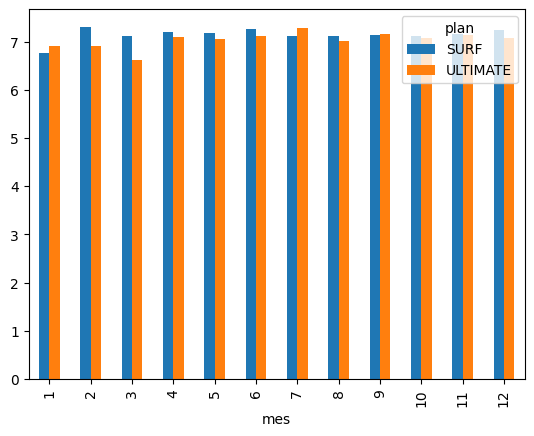

In [2389]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
calls_plans = df_calls.merge(df_users[['user_id', 'plan']], on = 'user_id', how = 'left')
calls_plans.pivot_table(index = 'mes', columns = 'plan', values = 'duration', aggfunc = 'mean').plot(kind = 'bar')

<Axes: ylabel='Frequency'>

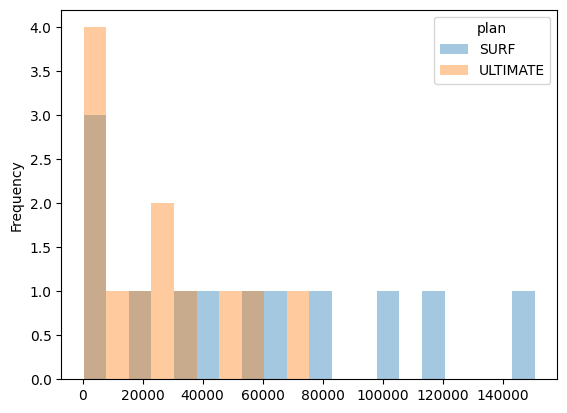

In [2436]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
calls_plans.pivot_table(index = 'mes', columns = 'plan', values = 'duration', aggfunc = 'sum').plot(kind = 'hist', bins = 20, alpha = 0.4)


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_calls = calls_plans.pivot_table(index = 'mes', columns = 'plan', values = 'duration', aggfunc = 'mean').reset_index()
var_calls= calls_plans.pivot_table(index = 'mes', columns = 'plan', values = 'duration', aggfunc = 'var').reset_index()
mean_var_calls = mean_calls.merge(var_calls, on = 'mes', how = 'left', suffixes=('_MEAN', '_VAR'))
mean_var_calls

plan,mes,SURF_MEAN,ULTIMATE_MEAN,SURF_VAR,ULTIMATE_VAR
0,1,6.766667,6.910714,28.995480,37.091055
1,2,7.303279,6.916667,36.381743,34.597461
2,3,7.106742,6.614130,33.656824,34.070435
3,4,7.191899,7.088176,34.754400,33.394424
4,5,7.173700,7.054491,35.962592,35.733997
5,6,7.251863,7.110522,36.481110,34.855589
6,7,7.124836,7.276061,34.794517,35.982694
7,8,7.124718,7.015709,35.277344,35.078787
8,9,7.128537,7.166857,36.022955,35.398330
9,10,7.120604,7.066706,35.133615,35.632088


In [2420]:
surf_1 = calls_plans[(calls_plans['mes'] == 1) & (calls_plans['plan'] == 'ULTIMATE')]
var_1 = np.var(surf_1['duration'])
var_1

np.float64(36.759885204081634)

<Axes: >

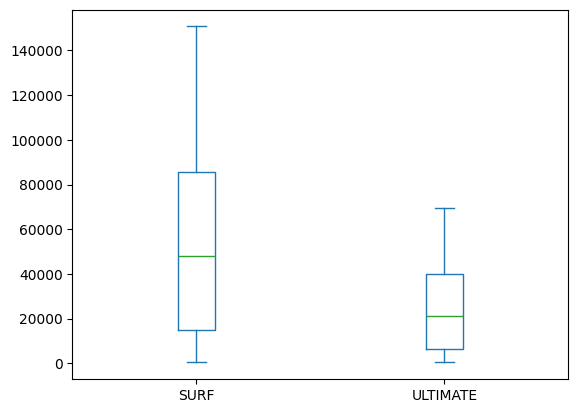

In [2434]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
calls_plans.pivot_table(index = 'mes', columns = 'plan', values = 'duration', aggfunc = 'sum').plot(kind = 'box')


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

<Axes: xlabel='mes'>

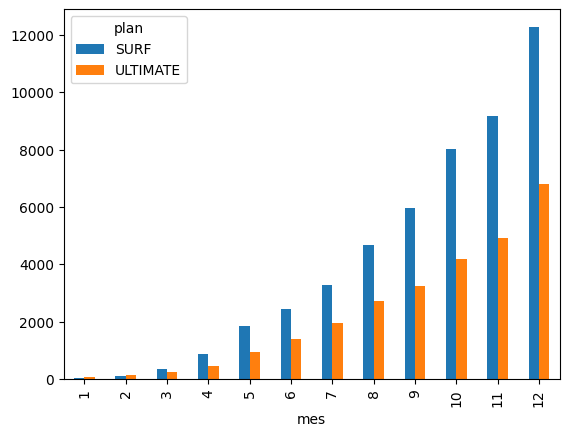

In [2441]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
menssages_plans = df_messages.merge(df_users[['user_id', 'plan']], on = 'user_id', how = 'left')
menssages_plans.pivot_table(index = 'mes', columns = 'plan', values = 'id', aggfunc = 'count').plot(kind = 'bar')


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

<Axes: xlabel='mes'>

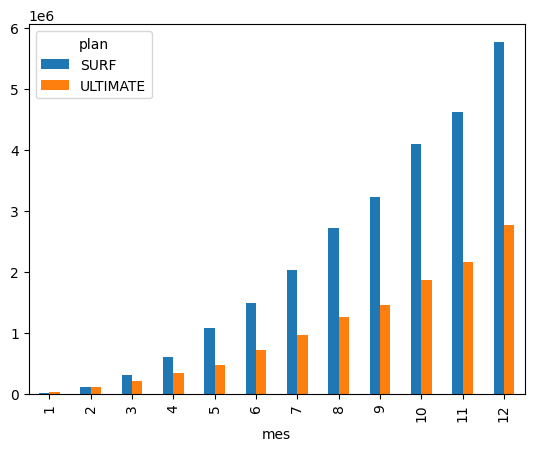

In [2458]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_plans = df_internet.merge(df_users[['user_id', 'plan']], on = 'user_id', how = 'left')
internet_plans.pivot_table(index = 'mes', columns = 'plan', values = 'mb_used', aggfunc = 'sum').plot(kind = 'bar')


<Axes: xlabel='mes'>

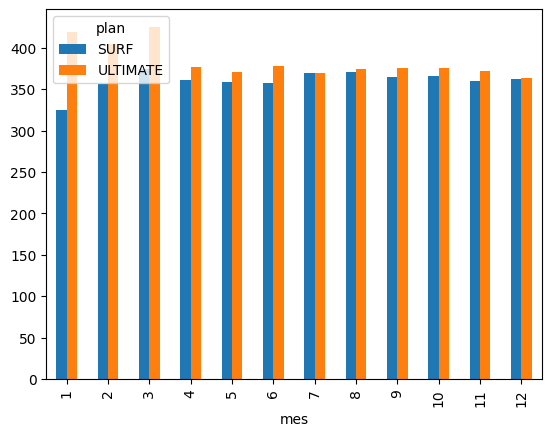

In [2459]:
internet_plans.pivot_table(index = 'mes', columns = 'plan', values = 'mb_used', aggfunc = 'mean').plot(kind = 'bar')

In [2464]:
mean_internet = internet_plans.pivot_table(index = 'mes', columns = 'plan', values = 'mb_used', aggfunc = 'mean').reset_index()
var_internet= internet_plans.pivot_table(index = 'mes', columns = 'plan', values = 'mb_used', aggfunc = 'var').reset_index()
mean_var_internet = mean_internet.merge(var_internet, on = 'mes', how = 'left', suffixes=('_MEAN', '_VAR'))
mean_var_internet

plan,mes,SURF_MEAN,ULTIMATE_MEAN,SURF_VAR,ULTIMATE_VAR
0,1,324.990667,419.278333,93153.511020,85602.073488
1,2,355.875292,405.073176,69482.421280,78036.855732
2,3,374.780366,425.257679,81349.331412,89264.982432
3,4,360.752649,377.430045,76440.369652,78628.848204
4,5,359.136322,370.853838,75674.416694,79487.314552
5,6,357.391844,378.614648,76078.395767,81291.940296
6,7,369.172091,369.620514,77048.159071,76003.409450
7,8,370.889269,373.993238,76283.342082,78820.600896
8,9,364.440406,375.169352,76389.662186,79094.313713
9,10,365.471799,375.866853,75040.482016,77886.312208


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

<Axes: xlabel='mes'>

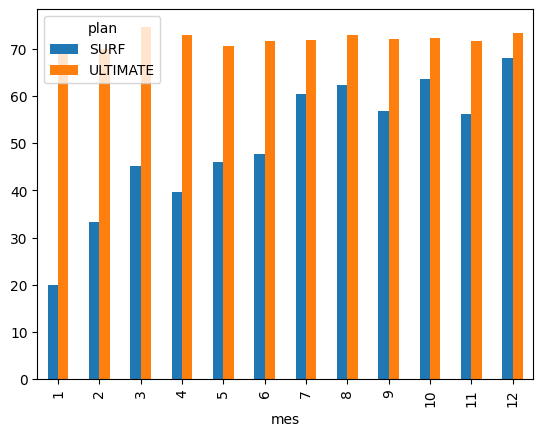

In [2466]:
df_monthly.pivot_table(index = 'mes', columns = 'plan', values = 'income', aggfunc = 'mean').plot(kind = 'bar')

<Axes: xlabel='mes'>

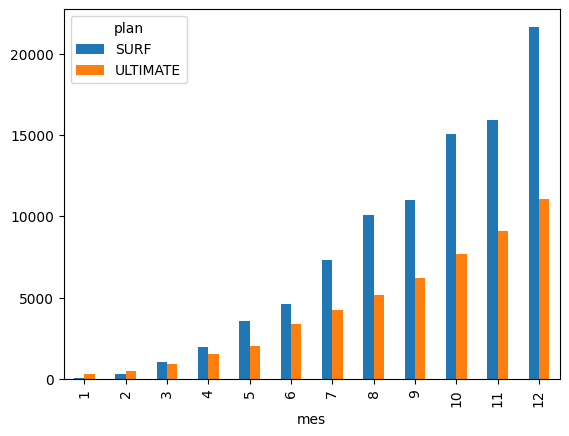

In [2467]:
df_monthly.pivot_table(index = 'mes', columns = 'plan', values = 'income', aggfunc = 'sum').plot(kind = 'bar')

In [2469]:
mean_income = df_monthly.pivot_table(index = 'mes', columns = 'plan', values = 'income', aggfunc = 'mean').reset_index()
var_income = df_monthly.pivot_table(index = 'mes', columns = 'plan', values = 'income', aggfunc = 'var').reset_index()
mean_var_income = mean_income.merge(var_income, on = 'mes', how = 'left', suffixes=('_MEAN', '_VAR'))
mean_var_income

plan,mes,SURF_MEAN,ULTIMATE_MEAN,SURF_VAR,ULTIMATE_VAR
0,1,20.000000,70.000000,0.000000,0.000000
1,2,33.360000,70.000000,449.206400,0.000000
2,3,45.234348,74.666667,1489.651098,145.515152
3,4,39.652200,73.000000,1198.121352,120.400000
4,5,45.969610,70.724138,1885.770970,15.206897
5,6,47.675155,71.638298,1923.268538,75.018501
6,7,60.475868,71.898305,2800.107781,104.472238
7,8,62.278951,72.859155,3479.524052,154.808451
8,9,56.835515,72.034884,2228.765394,75.939945
9,10,63.626920,72.311321,3096.703024,169.606918


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

Hipotesis nula: los ingresos promedio procedentes de los planes de llamadas Ultimate y Surf son iguales. 

Hipotesis alternativa: los ingresos promedio procedentes de los planes de llamadas Ultimate y Surf son distitos.
 
Nivel de significancia: 5% 

In [2475]:
# Prueba las hipótesis
ultimate_plan = mean_income['ULTIMATE']
surf_plan = mean_income['SURF']
alpha = 0.05

results = st.ttest_ind(ultimate_plan, surf_plan, equal_var= False ) 

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.00020400280250752802
Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

Hipotesis nula: los ingresos promedio procedentes de los usuarios del área NY-NJ son iguales a los ingresos promedio procedentes de los usuarios de las demás áreas.

Hipotesis alternativa: los ingresos promedio procedentes de los usuarios del área NY-NJ son diferentes a los ingresos promedio procedentes de los usuarios de las demás áreas.
 
Nivel de significancia: 5% 

In [2501]:
# Prueba las hipótesis
ny_nj = df_users[df_users['city'] == 'NEW YORK NEWARK JERSEY CITY NY NJ PA MSA']
ny_nj = ny_nj.merge(df_monthly[['user_id', 'mes', 'income']], on = 'user_id')
ny_nj = ny_nj['income']
other_areas = df_users[df_users['city'] != 'NEW YORK NEWARK JERSEY CITY NY NJ PA MSA']
other_areas = other_areas.merge(df_monthly[['user_id', 'mes', 'income']], on = 'user_id')
other_areas = other_areas['income']


In [2502]:
alpha = 0.05

results = st.ttest_ind(ny_nj, other_areas, equal_var= False ) 

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.028765503550625456
Rechazamos la hipótesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]